In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
np.random.seed(18)

# Assignment1

In [2]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 600
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate([X0, X1, X2], axis=0)
K = 3

origin_label = np.asarray([0]*N + [1]*N + [2]*N).T

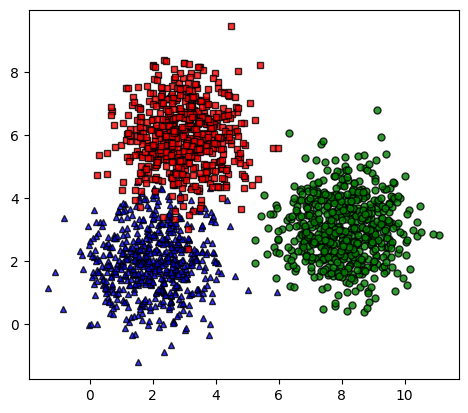

In [3]:
def kmeans_display(X, label):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    kwargs = {'markersize': 5, 'alpha': .8, 'markeredgecolor': 'k'}
    plt.plot(X0[:, 0], X0[:, 1], '^b', **kwargs)
    plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)
    
    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.plot()
    plt.show()
   
kmeans_display(X, origin_label) 

In [4]:
def kmeans_init_centroids(X, k):
    return X[np.random.choice(X.shape[0], k)]

def kmeans_assign_label(X, centroids):
    d = cdist(X, centroids)
    return np.argmin(d, axis=1)

def kmeans_update_centroids(X, label, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        X_k = X[label == k, :]
        centroids[k, :] = np.mean(X_k, axis=0)
    return centroids

def has_converged(centroids, new_centroids):
    return (set([tuple(centroid) for centroid in centroids]) == set([tuple(n_centroid) for n_centroid in new_centroids]))

def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    iterator = 0
    while True:
        labels.append(kmeans_assign_label(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        iterator += 1
    return (centroids, labels, iterator)

Centers found by our algorithms: 
 [[1.98176    1.98610348]
 [3.00051896 5.98862587]
 [8.06378913 3.00929961]]


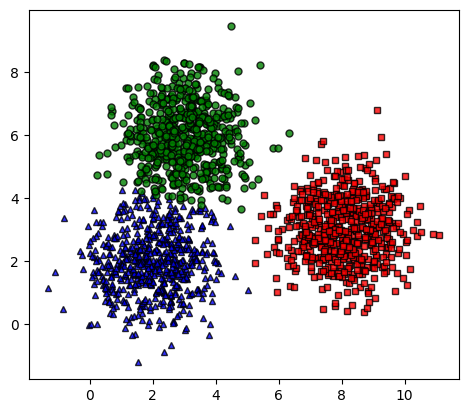

In [5]:
(centroids, labels, iterator) = kmeans(X, K)
print("Centers found by our algorithms: \n", centroids[-1])
kmeans_display(X, labels[-1])

Centers found by scikit-learn:
[[8.06378913 3.00929961]
 [2.99440014 5.97258708]
 [1.97943982 1.96877067]]


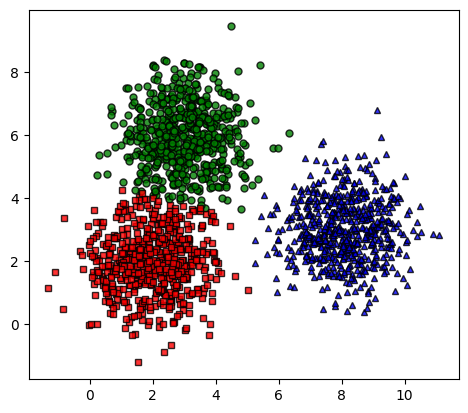

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print("Centers found by scikit-learn:")
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label)

Kết quả phân cụm bằng scikit-learn với implement bằng tay không có sự khác nhau

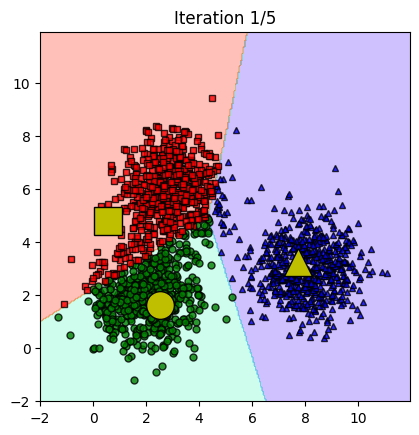

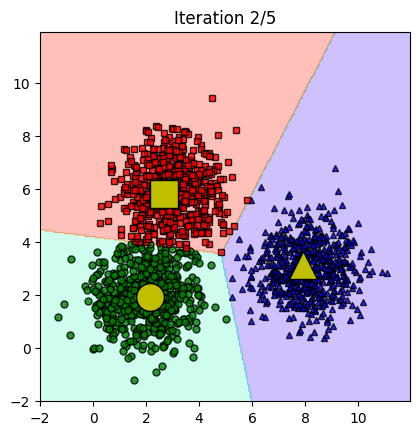

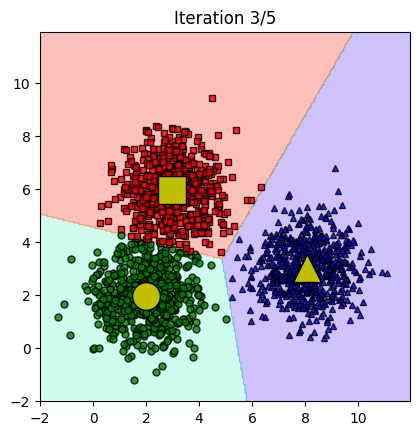

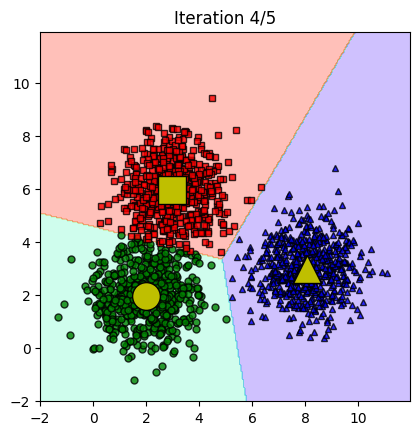

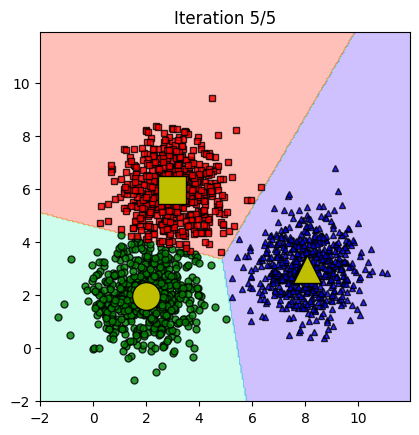

In [ ]:
def kmeans_display_progress(X, labels, centroids):
    K = len(centroids[0])  # Số cụm
    n_iterations = len(labels)

    # Các cụm dữ liệu và marker tương ứng
    markers = ['^b', 'go', 'rs']
    centroid_markers = ['^', 'o', 's']
    #colors = ['b', 'g', 'r']
    
    for i in range(n_iterations):
        centroid = centroids[i]
        label = labels[i]
        
        x_min, x_max = -2, 12
        y_min, y_max = -2, 12
        h = 0.05  # Độ phân giải của lưới

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        grid_points = np.c_[xx.ravel(), yy.ravel()]
        grid_labels = kmeans_assign_label(grid_points, centroid)

        # Reshape kết quả phân cụm để phù hợp với grid
        grid_labels = grid_labels.reshape(xx.shape)

        # Tô màu vùng quyết định
        plt.contourf(xx, yy, grid_labels, alpha=0.3, cmap=plt.cm.rainbow)

        # # Vẽ dữ liệu phân cụm
        # X0 = X[label == 0, :]
        # X1 = X[label == 1, :]
        # X2 = X[label == 2, :]

        # kwargs = {'markersize': 5, 'alpha': .8, 'markeredgecolor': 'k'}
        # plt.plot(X0[:, 0], X0[:, 1], '^b', **kwargs)
        # plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
        # plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

        # # Vẽ các centroid
        # plt.plot(centroids[:, 0], centroids[:, 1], 'y*', markersize=20, markeredgecolor='k')

        # plt.axis([x_min, x_max, y_min, y_max])
        # plt.axis('scaled')
        # plt.show()

        for k in range(K):
            Xk = X[label == k, :]
            plt.plot(Xk[:, 0], Xk[:, 1], markers[k], markersize=5, alpha=0.8, markeredgecolor='k')
            plt.plot(centroid[k, 0], centroid[k, 1], centroid_markers[k], 
                    markersize=20, markeredgecolor='k', color='y') #color=colors[k])

        plt.title(f'Iteration {i+1}/{n_iterations}')
        plt.axis([x_min, x_max, y_min, y_max])
        plt.axis('scaled')
        plt.show()

kmeans_display_progress(X, labels, centroids)

In [27]:
def compute_sse(X, centroids, labels):
    sse = 0
    for k in range(len(centroids)):
        cluster_points = X[labels == k]
        sse += np.sum((cluster_points - centroids[k]) ** 2)
    return sse

def run_kmeans_multiple_times(X, K, runs=10):
    results = []
    for i in range(runs):
        centroids, labels, n_iter = kmeans(X, K)
        final_centroids = centroids[-1]
        final_labels = labels[-1]
        sse = compute_sse(X, final_centroids, final_labels)
        results.append((i+1, n_iter, sse))
        print(f"Run {i+1}: Iterations = {n_iter}, SSE = {sse:.2f}")
    return results

results = run_kmeans_multiple_times(X, K, runs=10)

for res in results:
    print(res)

Run 1: Iterations = 3, SSE = 3560.25
Run 2: Iterations = 7, SSE = 8242.22
Run 3: Iterations = 8, SSE = 3560.25
Run 4: Iterations = 6, SSE = 3560.25
Run 5: Iterations = 4, SSE = 3560.31
Run 6: Iterations = 6, SSE = 3560.31
Run 7: Iterations = 7, SSE = 3560.25
Run 8: Iterations = 4, SSE = 3560.31
Run 9: Iterations = 28, SSE = 8248.95
Run 10: Iterations = 5, SSE = 3560.25
(1, 3, np.float64(3560.247474216414))
(2, 7, np.float64(8242.221426549575))
(3, 8, np.float64(3560.247474216414))
(4, 6, np.float64(3560.247474216414))
(5, 4, np.float64(3560.3069855457748))
(6, 6, np.float64(3560.3069855457748))
(7, 7, np.float64(3560.2474742164136))
(8, 4, np.float64(3560.3069855457748))
(9, 28, np.float64(8248.954543651855))
(10, 5, np.float64(3560.247474216414))


Việc khởi tạo cụm ngẫu nhiên

- Kết quả kmeans phụ thuộc khá nhiều vào khởi tạo ban đầu : khởi tạo ban đầu gần trung tâm thật -> Số vòng lặp ít -> Hội tụ nhanh -> Kết quả tốt
- Tạo 3 cụm phân phối Gaussian đều và tách biệt nhau -> bộ dữ liệu tách đều nhau -> kmeans hoạt động hiệu quả

# Assignment2

In [28]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 1070
X0 = np.random.multivariate_normal(means[0], cov, 50)
X1 = np.random.multivariate_normal(means[1], cov, 20)
X2 = np.random.multivariate_normal(means[2], cov, 1000)

X = np.concatenate([X0, X1, X2], axis=0)
K = 3

origin_label = np.asarray([0]*50 + [1]*20 + [2]*1000).T

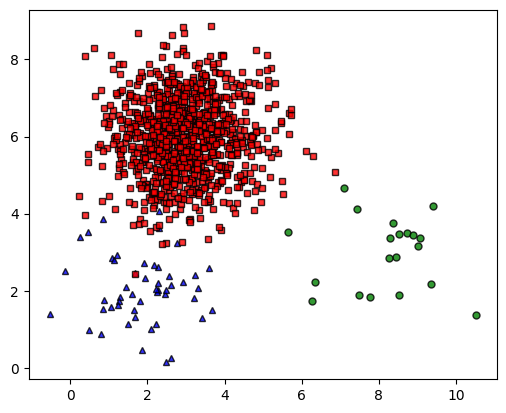

In [29]:
kmeans_display(X, origin_label) 

Centers found by our algorithms: 
 [[4.70870251 5.54783244]
 [2.6616206  6.39401776]
 [2.32079014 3.94950791]]


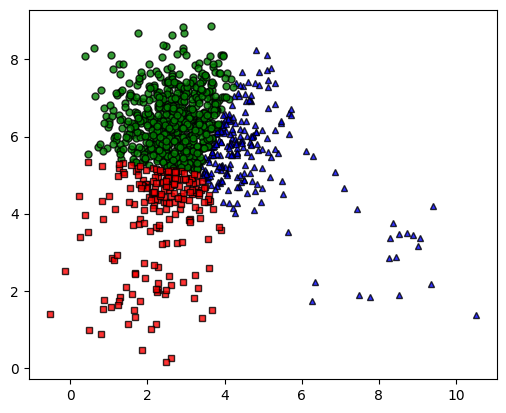

In [30]:
(centroids, labels, iterator) = kmeans(X, K)
print("Centers found by our algorithms: \n", centroids[-1])
kmeans_display(X, labels[-1])

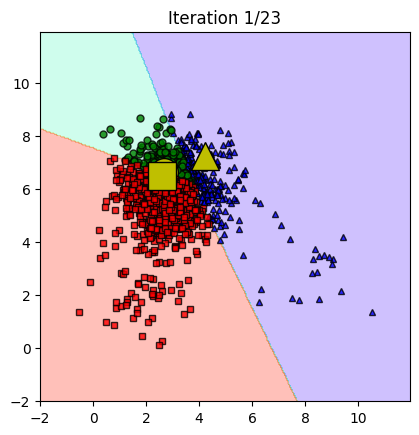

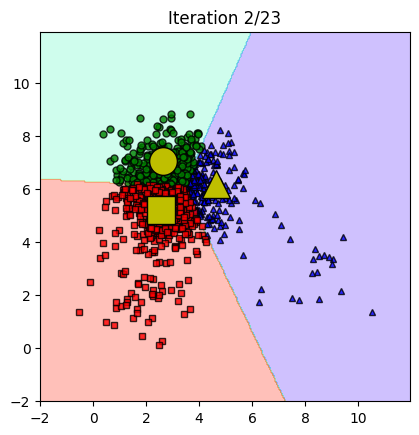

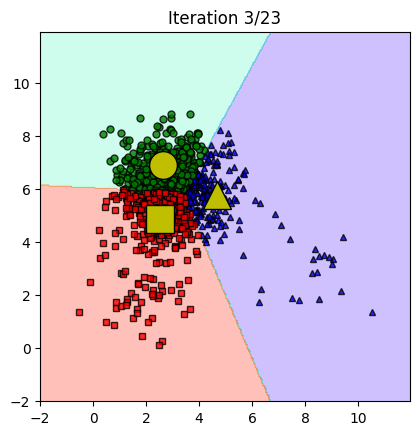

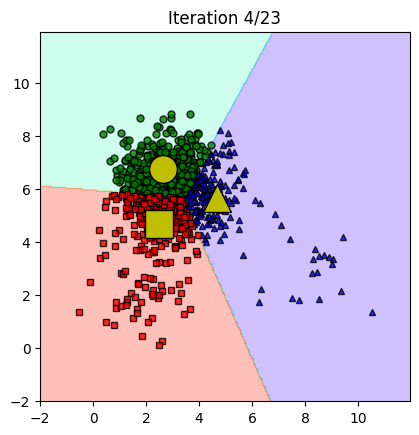

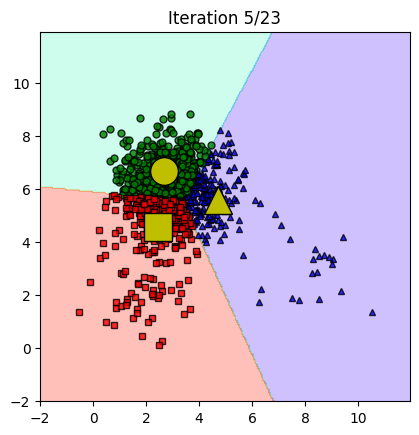

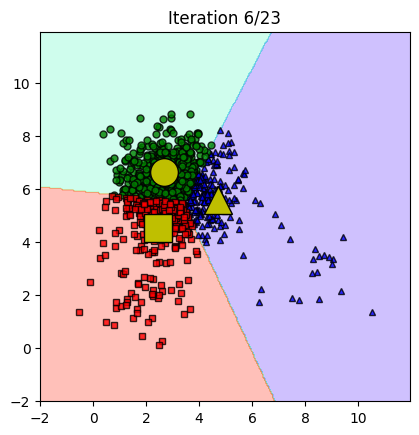

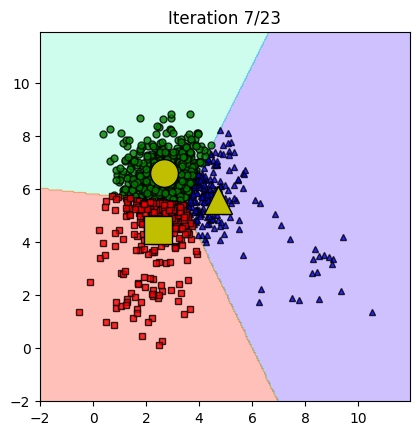

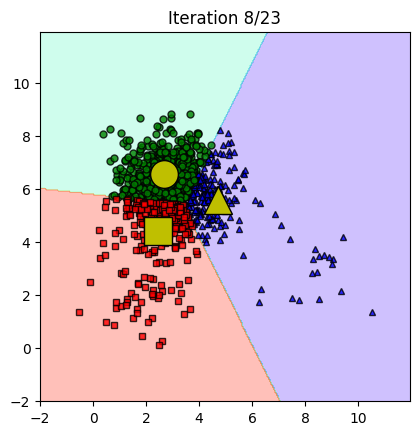

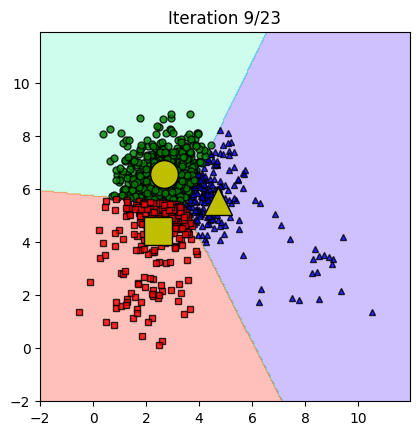

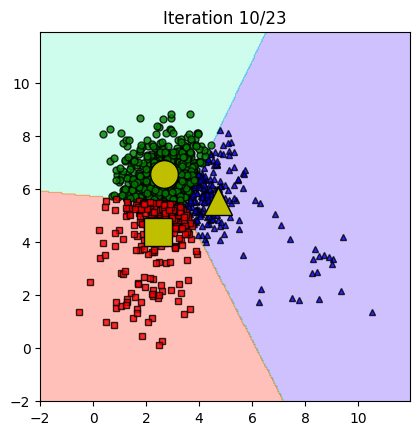

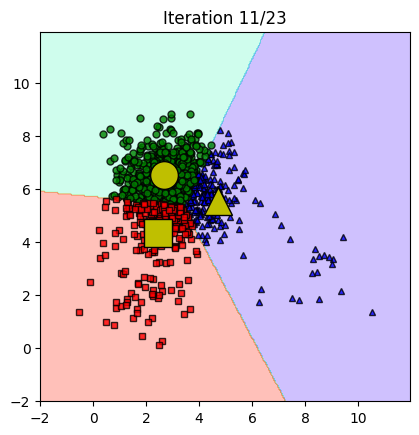

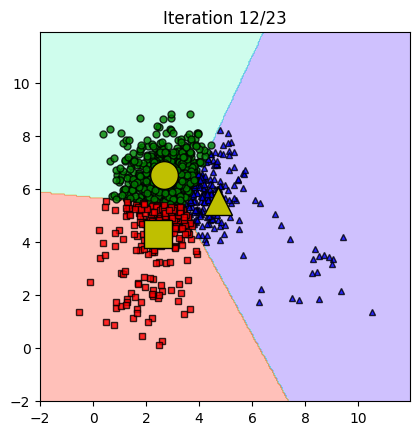

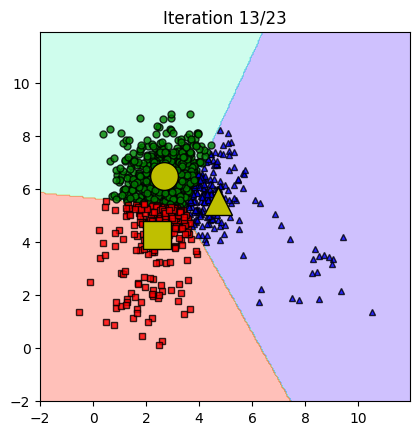

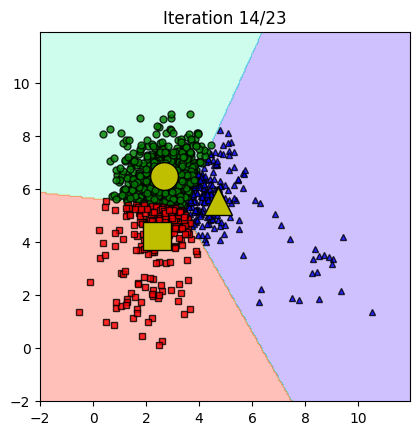

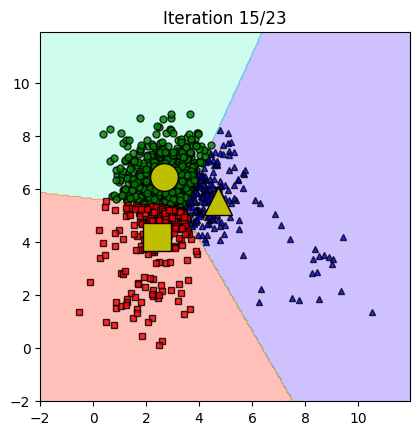

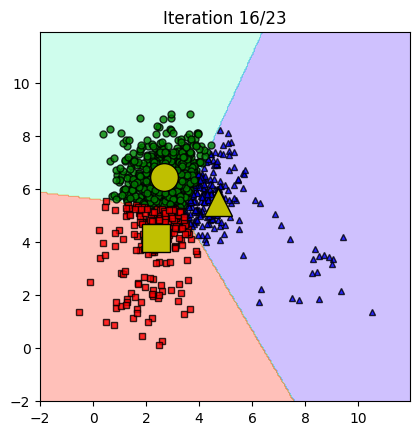

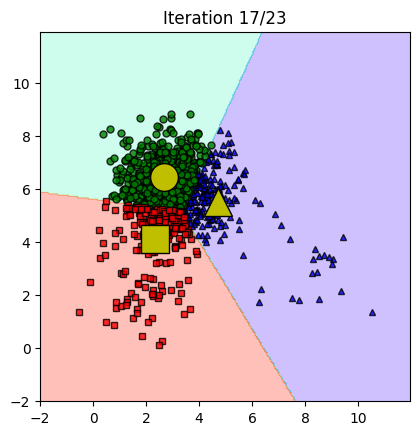

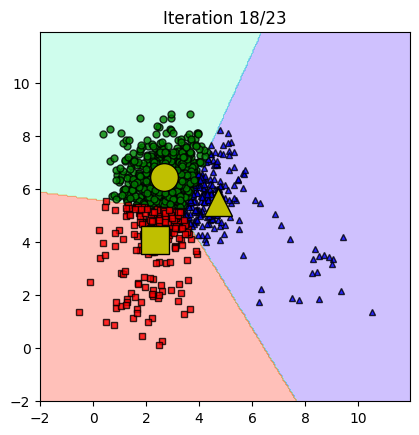

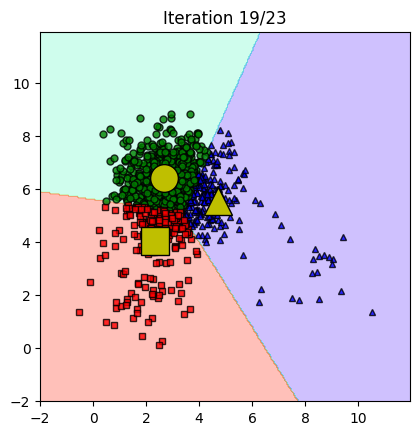

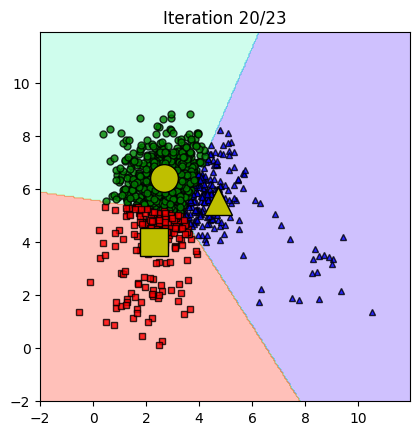

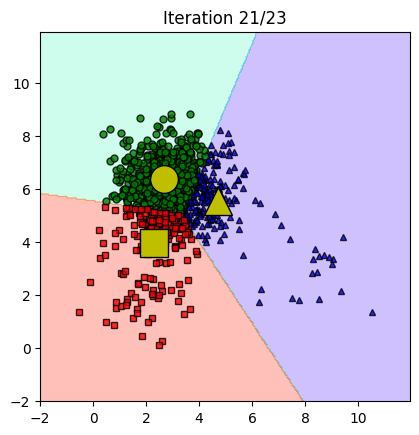

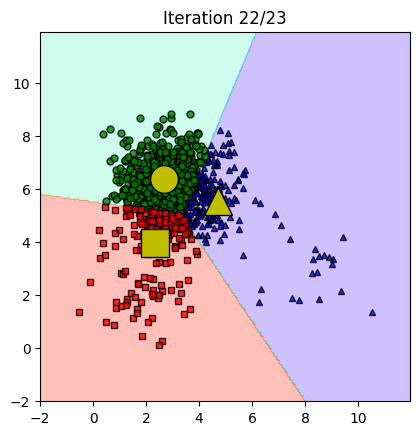

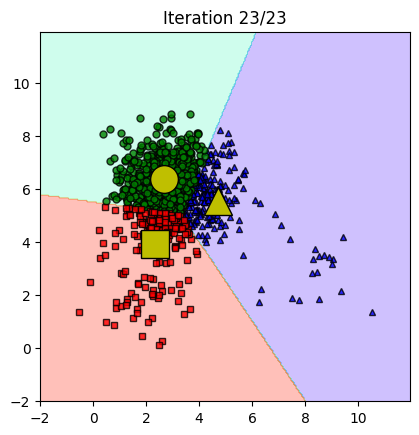

In [31]:
kmeans_display_progress(X, labels, centroids)

In [32]:
results = run_kmeans_multiple_times(X, K, runs=10)
for res in results:
    print(res)

Run 1: Iterations = 36, SSE = 1833.36
Run 2: Iterations = 19, SSE = 1940.80
Run 3: Iterations = 45, SSE = 1943.22
Run 4: Iterations = 8, SSE = 1858.22
Run 5: Iterations = 15, SSE = 1833.46
Run 6: Iterations = 38, SSE = 1833.36
Run 7: Iterations = 43, SSE = 1836.99
Run 8: Iterations = 47, SSE = 1833.36
Run 9: Iterations = 24, SSE = 1833.67
Run 10: Iterations = 26, SSE = 1836.99
(1, 36, np.float64(1833.357150520244))
(2, 19, np.float64(1940.7972722717852))
(3, 45, np.float64(1943.2237046104449))
(4, 8, np.float64(1858.2240465908822))
(5, 15, np.float64(1833.459714147015))
(6, 38, np.float64(1833.357150520244))
(7, 43, np.float64(1836.9948948176407))
(8, 47, np.float64(1833.357150520244))
(9, 24, np.float64(1833.6690910508091))
(10, 26, np.float64(1836.9948948176407))


Việc dữ liệu của các bộ khác nhau ảnh hưởng đến kết quả của kmeans:
- Dữ liệu có độ chênh lệch lớn, phân bố rải rác
- Số vòng lặp lớn -> Hội tụ chậm -> Thuật toán kmeans chưa hiệu quả
- Bộ dữ liệu sau khi dùng kmeans -> tách chưa rõ ràng và bị thay đổi hình dạng cụm trung tâm -> kmeans chưa hiệu quả

# Assignment3

In [33]:
means = [[2, 2], [8, 3], [3, 6]]
cov1 = [[1, 0], [0, 1]]
cov2 = [[10, 0], [0, 1]]
N = 600
X0 = np.random.multivariate_normal(means[0], cov1, N)
X1 = np.random.multivariate_normal(means[1], cov1, N)
X2 = np.random.multivariate_normal(means[2], cov2, N)

X = np.concatenate([X0, X1, X2], axis=0)
K = 3

origin_label = np.asarray([0]*N + [1]*N + [2]*N).T

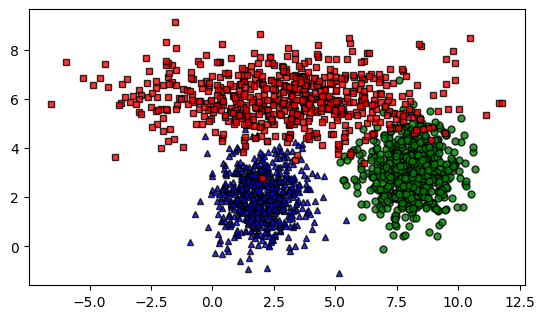

In [34]:
kmeans_display(X, origin_label) 

Centers found by our algorithms: 
 [[7.8171356  3.59761619]
 [1.7668179  6.06136621]
 [1.98714805 1.96568713]]


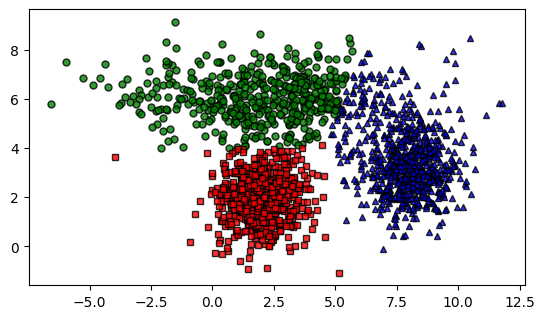

In [35]:
(centroids, labels, iterator) = kmeans(X, K)
print("Centers found by our algorithms: \n", centroids[-1])
kmeans_display(X, labels[-1])

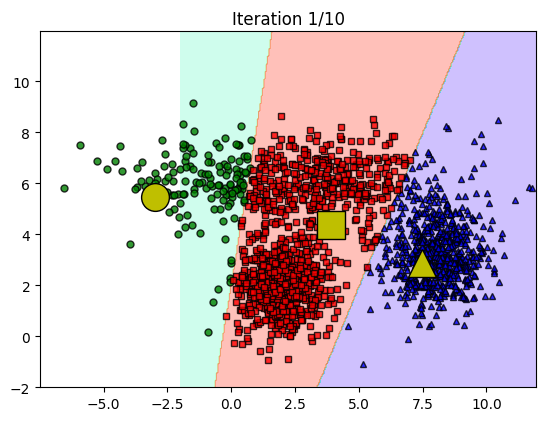

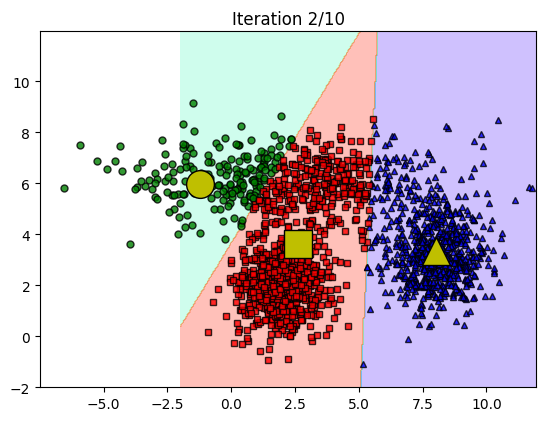

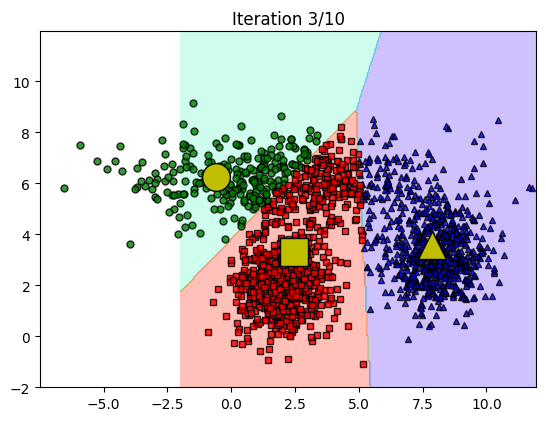

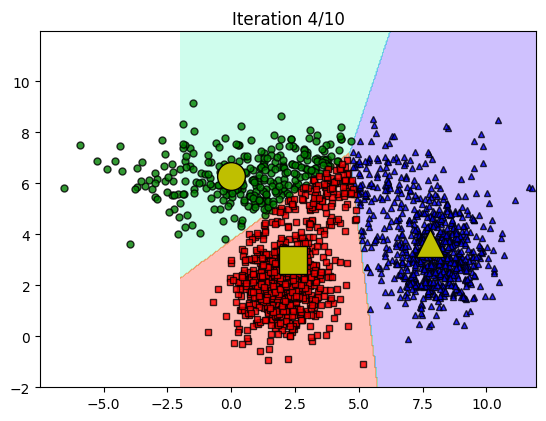

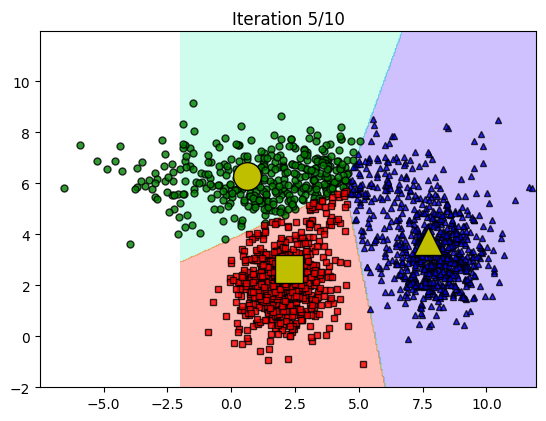

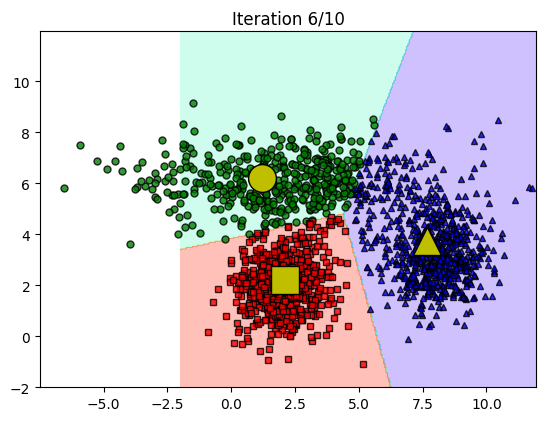

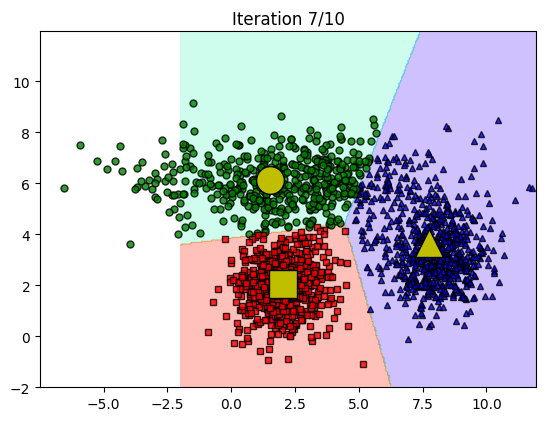

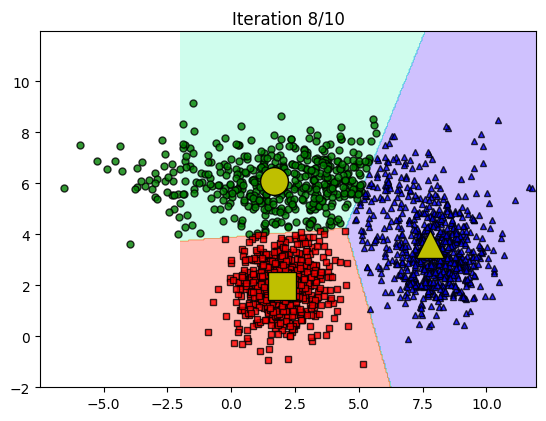

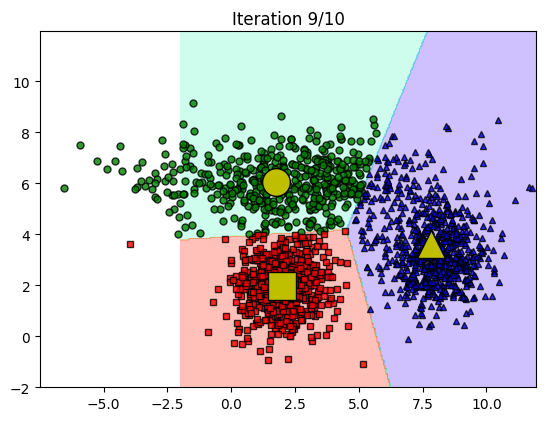

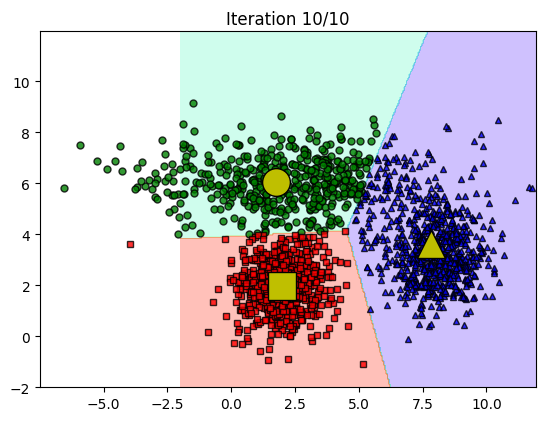

In [36]:
kmeans_display_progress(X, labels, centroids)

In [37]:
results = run_kmeans_multiple_times(X, K, runs=10)
for res in results:
    print(res)

Run 1: Iterations = 19, SSE = 6680.95
Run 2: Iterations = 8, SSE = 6680.95
Run 3: Iterations = 8, SSE = 6680.95
Run 4: Iterations = 8, SSE = 6680.95
Run 5: Iterations = 13, SSE = 6680.95
Run 6: Iterations = 11, SSE = 6680.95
Run 7: Iterations = 7, SSE = 6680.95
Run 8: Iterations = 18, SSE = 6680.95
Run 9: Iterations = 7, SSE = 6680.95
Run 10: Iterations = 15, SSE = 6680.95
(1, 19, np.float64(6680.948468818002))
(2, 8, np.float64(6680.948468818002))
(3, 8, np.float64(6680.948468818002))
(4, 8, np.float64(6680.948468818002))
(5, 13, np.float64(6680.948468818002))
(6, 11, np.float64(6680.948468818002))
(7, 7, np.float64(6680.948468818002))
(8, 18, np.float64(6680.948468818002))
(9, 7, np.float64(6680.948468818002))
(10, 15, np.float64(6680.948468818002))


Việc thay đổi hiệp phương sai ảnh hưởng đến kmeans:
- Dữ liệu 3,6 phân tán rộng hơn
- Số vòng lặp không ít, nhưng không quá nhiều -> hội tụ chậm
- Phân biệt rõ được 2 cụm 2,2 8,3 tuy nhiên cụm còn lại bị phân mảnh, tách 1 ít sang 2 cụm còn lại
-> Dữ liệu không thuộc cụm đồng nhất, có phương sai lớn phân tán rải rác -> kmeans không hiệu quả